In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#gap = pd.read_csv('c:\DatasRev\gapminder.csv')
gap = pd.read_csv('https://raw.githubusercontent.com/DatasRev/workshop-prep/master/06_data_cleaning_2/gapminder.csv')
gap.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


Life expentancy oszlopot indexnek illetve Country-ra átnevezni, NaN értékek kezelése, Unnamed oszlopot eltűntetni,tidy data három oszlopra (country, year, life_expectancy).

In [2]:
# Adatszett vizsgálata, 780 sor, 219 oszlop, amiből egy object, a többi float és int.
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
# Az object típusú oszlop jelen esetben string, nincsenek közte számok, nem kell típuskonverzió.

gap.select_dtypes(include=['object']).head()

,Life expectancy
0,Abkhazia
1,Afghanistan
2,Akrotiri and Dhekelia
3,Albania
4,Algeria


Dropolni kell az Unnamed: 0 oszlopot, anélkül nem fogja tudni jól értelmezni a pd.melt parancsot. Meg kell adni az axis-t is, jelen esetben az 1-et, az jelenti az oszlopot, anélkül KeyError: "['Unnamed: 0'] not found in axis" hibát fog dobni.

In [4]:
gap = gap.drop('Unnamed: 0', 1)
gap.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


Táblázat összeolvassztása, a 'Life expectancy' oszlopot indexként használva. Átnevezzük az oszlopokat az áttekinthetőség miatt, hogy ne variable, meg value legyen a két név.

In [5]:
gap_melt = pd.melt(gap, id_vars='Life expectancy')
gap_melt.columns = ['country', 'year', 'life_expectancy']
gap_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [6]:
# A melt után a year oszlop object, azaz string lett, ezt vissza kell alakítani.
gap_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


Az assert paranccsal ellenőrizhető az átalakítás eredménye. Ha nem ad vissza hibaüzenetet, az azt jelenti, hogy átment a teszten, TRUE-ra értékelődött. Mivel itt kevés az oszlop, a könnyebb láthatóság kedvéért lekértem a .info()-t is, int64 lett.

In [7]:
gap_melt['year'] = pd.to_numeric(gap_melt['year'])
assert gap_melt.year.dtypes == np.int64
gap_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


Memória használat optimalizálása. Az int64-re konvertált 'year' oszloppal kicsit előre haladtunk, de példának jó. 

In [8]:
original_mem = gap_melt.memory_usage(deep=True)
original_mem

Index                    80
country            11311125
year                1354080
life_expectancy     1354080
dtype: int64

A 'year' oszlopot int16-ra váltjuk, mivel az a legkisebb egység, amibe beleférnek az 1800-2016-ig tartó évszámok.
A 'country' oszlopot 'category'-ra módosítjuk, mivel az országok száma nem túl nagy, és csak ismétlődik folyamatosan.
A 'life_expectancy' oszlop a legtrükkösebb. Mivel itt sincsenek nagy számok, és óriási precízióra sincs szükségünk
(lásd: https://stackoverflow.com/questions/872544/what-range-of-numbers-can-be-represented-in-a-16-32-and-64-bit-ieee-754-syste).
Viszont, mivel lefeleztük a float64-et, ezért a számok már nem két tizedesjeggyel fognak szerepelni 
(lásd: https://stackoverflow.com/questions/52928523/pandas-float64-to-float-32-then-the-data-changes), ezért a pandas 'precision'
parancsát kell használni, mivel a round nem fog működni.

Int8:	-128 ->	127
Int16:	-32768 -> 32767
Int32:	-2147483648 -> 2147483647
Int64:	-9223372036854775808 ->	9223372036854775807

Az új oszloptípusok rengeteg memóriát megspóroltak, ahogy ez látható is.

In [9]:
gap_melt['year'] = gap_melt['year'].astype(np.int16)
gap_melt['country'] = gap_melt['country'].astype('category')
gap_melt['life_expectancy'] = gap_melt['life_expectancy'].astype(np.float32)
new_mem = gap_melt.memory_usage(deep=True)

new_mem

Index                  80
country            366158
year               338520
life_expectancy    677040
dtype: int64

In [10]:
# Látható, hogy nem működik a round a, csak ha egész számra kerekítünk (round()).
gap_melt['life_expectancy'].round(2).sample(5)

96023           NaN
51927           NaN
126512          NaN
140074    62.619999
122513          NaN
Name: life_expectancy, dtype: float32

In [11]:
new_mem.sum() / original_mem.sum()

0.09856352267024933

A következő lépés a 'country' oszlop tartalmának átnézése, van-e bármilyen speciális, vagy helytelen karakter a nevekben. Ehhez először szűrjük az oszlopot a duplikációtól. 

In [12]:
pd.set_option('precision', 2)
gap_melt['life_expectancy'].head()

0      NaN
1    28.21
2      NaN
3    35.40
4    28.82
Name: life_expectancy, dtype: float32

In [13]:
countries = gap_melt['country']
countries.count()

169260

In [14]:
countries = countries.drop_duplicates()
countries.count()

260

Regexp segítségével összeállítunk egy mintát, hogy szerintünk mik szerepelnek egy országnévben: kisbetű, nagybetű, pont, szóköz.
"Anchor the pattern to match exactly what you want by placing a ^ in the beginning and $ in the end.
Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and \s to match whitespace between words."

A mask változónak odaadjuk ezt a mintát, kihasználva a countries stringeknél használható contains parancsot, ami bool értéket ad vissza.

A mask-ot meghívva látjuk, hogy egy series az eredmény, True/False értékekkel.

A ~ karakterrel megfordítjuk az eredményt, ez látszik is a példánál.

In [15]:
pattern = '^[A-Za-z\.\s]*$'
mask = countries.str.contains(pattern)
mask.head()

0    True
1    True
2    True
3    True
4    True
Name: country, dtype: bool

In [16]:
mask_inverse = ~mask
mask_inverse.head()

0    False
1    False
2    False
3    False
4    False
Name: country, dtype: bool

Lekérjük azokat az országokat, amikben általunk nem engedett karakterek vannak.

In [17]:
invalid_countries = countries.loc[mask_inverse]
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: category
Categories (260, object): [Abkhazia, Afghanistan, Akrotiri and Dhekelia, Albania, ..., Yugoslavia, Zambia, Zimbabwe, Åland]

Ellenőrizzük, hogy a year, és a country oszlopokban nincs-e NULL sor. A life_expentancyt nem kell ellenőrizni, arról tudjuk, hogy rengeteg a hiányos adat. A dropna után negyedelődik a sorok száma.

In [18]:
gap_melt.count()

country            169260
year               169260
life_expectancy     43857
dtype: int64

In [19]:
assert pd.notnull(gap_melt.country).all()
assert pd.notnull(gap_melt.year).all()
gap_melt = gap_melt.dropna()
gap_melt.count()

country            43857
year               43857
life_expectancy    43857
dtype: int64

In [20]:
gap_melt.sample(10)

,country,year,life_expectancy
57903,Reunion,1874,33.00
130759,United Kingdom,1967,72.06
14204,Nigeria,1818,30.40
43154,Yemen,1855,23.39
30653,Turkmenistan,1839,24.00
115779,Gabon,1948,33.52
152378,Bangladesh,1995,61.60
168287,Equatorial Guinea,2015,61.00
89401,Taiwan,1914,31.90
18010,Estonia,1823,38.71


Most, hogy megvan a tisztított adatszett, egy gyors vizualizációval megnézhetjük, hogy jónak tűnnek-e a life_expentancy adatok. Ha nincs 0-nál kisebb adat, az jó jel.

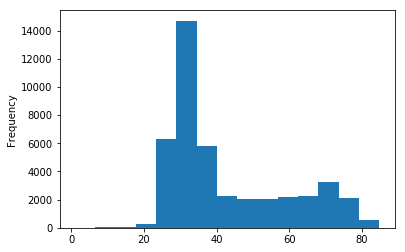

In [21]:
gap_melt['life_expectancy'].plot(kind='hist', bins=15)

A végső vizualizációval megnézzük, hogyan változott az évek alatt az átlagéletkor. Ehhez groupby-olni kell évenként az átlagéletkort, és megjeleníteni.

In [22]:
gap_agg = gap_melt.groupby('year')['life_expectancy'].mean()
gap_agg.tail()

year
2012    71.66
2013    71.92
2014    72.09
2015    72.32
2016    72.56
Name: life_expectancy, dtype: float32

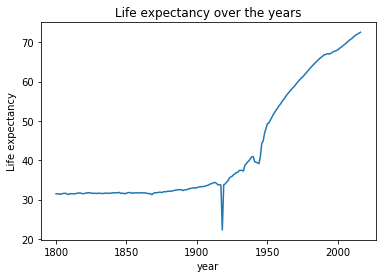

In [23]:
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')
gap_agg.plot()

Ha már ennyit dolgoztunk, illik el is menteni.

In [24]:
gap_melt.to_csv('gapminder.csv')
gap_agg.to_csv('gapminder_agg.csv')